# Introduction the regrression with Neural Networks in Tensorflow

There are manly definitions for a regression problem but we're going to simplify it: predictiong a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit


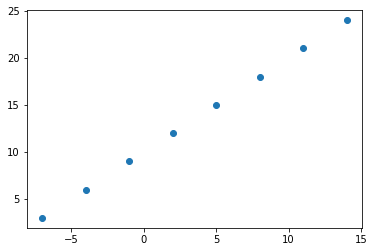

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y)

In [ ]:
# Find the pattern:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input & output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], Y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0].ndim

0

In [ ]:
# Turn NumPy into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with Tensorflow

1. **Creating a model** - define input & output layers, as well as hidden layers.
2. **Compiling a model** - define the loss function (the function that tells the model how wrong it is) and the optimizer (tells how to improve the patterns its learning) and evaluation metrics (what we can use to determine the preformance of the model).config
3. Fitting a model - letting the model try to find patterns between X & Y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean abosolue error (predicted vs observed)
               optimizer=tf.keras.optimizers.SGD(), # SGD = stochastic(random) gradient decent
               metrics=["mae"])

# 3. Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 587ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try & make a perdiction using model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving our model

We can improve the model by altering the stemps used to create the model.

1. **Creating a model** - we might add more layers, increase the number of hidden units (all called neurons) withing each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the opt function.
3. **fitting a model** - might fit a model with more **epochs** (leaving it training for longer) or mor#e data (more examples to learn from).

In [ ]:
# Rebuild our model:

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean abosolue error (predicted vs observed)
               optimizer=tf.keras.optimizers.SGD(), # SGD = stochastic(random) gradient decent
               metrics=["mae"])

# 3. Fit the model
model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 303ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# See if the model had improved:
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Rebuild our model better:

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean abosolue error (predicted vs observed)
               optimizer=tf.keras.optimizers.Adam(lr=.0001), # 
               metrics=["mae"])

# 3. Fit the model
model.fit(X, Y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 306ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5731 - mae: 10.5731
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5727 - mae: 10.5727
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5722 - mae: 10.5722
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5718 - mae: 10.5718
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5713 - mae: 10.5713
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 10.5709 - mae: 10.5709
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5704 - mae: 10.5704
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5700 - mae: 10.5700
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5695 - mae: 10.5695
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
# See if the model had improved:
model.predict([17.0])
# Nope...

array([[14.394114]], dtype=float32)

In [ ]:
# Rebuild our model better:

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean abosolue error (predicted vs observed)
               optimizer=tf.keras.optimizers.Adam(lr=.0001), # 
               metrics=["mae"])

# 3. Fit the model
model.fit(X, Y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 394ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 14.0321 - mae: 14.0321
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 14.0236 - mae: 14.0236
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 14.0150 - mae: 14.0150
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0065 - mae: 14.0065
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.9980 - mae: 13.9980
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9894 - mae: 13.9894
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 13.9809 - mae: 13.9809
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 13.9724 - mae: 13.9724
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 13.9638 - mae: 13.9638
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
# See if the model had improved:
model.predict([17.0])
# Nope...

array([[0.5881993]], dtype=float32)

In [ ]:
# See if I cam improve it right

# 1. create with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", # mae = mean abosolue error (predicted vs observed)
               optimizer=tf.keras.optimizers.Adam(lr=.01), # 
               metrics=["mae"])

# 3. Fit the model
model.fit(X, Y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 374ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6189 - mae: 12.6189
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9164 - mae: 11.9164
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2153 - mae: 11.2153
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5129 - mae: 10.5129
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8064 - mae: 9.8064
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0930 - mae: 9.0930
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 8.3699 - mae: 8.3699
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6340 - mae: 7.6340
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8821 - mae: 6.8821
Epoch 11/100
1/1 [==============================] - 0s 6ms/step -

In [ ]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# See if the model had improved:
model.predict([17.0])
# Yes!

array([[27.324867]], dtype=float32)

## Evaluation a model

in practice, a typical workflow I will go through when building a network is:

`Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...`

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize visualize"

It's a good idea to visualize:
* The data - what are we working with? What does it look like?
* The model itself - what does our model look like? 
* The training of a model - how does a model preform while it learns?
* The predictions of a modle - how do the predictions of a model line up against the ground truth (original lables)?

In [1]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

NameError: ignored

In [2]:
# Make labels for the dataset
Y = X + 10
Y

NameError: ignored

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, Y)

### The 3 sets...

* **Training ste** - the model learns from this data, which is typiccally 70-80% of total data available.
* **Validation set** - the model gets turned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total thes data available.

In [ ]:
# Check the length of how many samples I have
len(X)

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 samples are (80% of the data)
Y_train = Y[:40] # first 40 samples are (80% of the data)
X_test = X[40:] #last 10 samples (20% of data)
Y_test = Y[40:] #last 10 samples (20% of data)

len(X_train), len(X_test), len(Y_train), len(Y_test)

### Visulizing the data

Now we've got our data in trainging and test sets... let
s visulize

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# How to build a neural network for data.

# 1. create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(X_train, Y_train, epochs=100)


### Visulizing the Model:

In [ ]:
# Let's create a model that builds automatically by specefing an input_shape
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), #one number
                             tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
model.summary()

* Total params - total number of parameters in the model.
* Trainable params - these are the params (patterns) the model can uptdate as it trains.
* Non-trainable params - these params are not updated duting training (typical when importing params from other models during transfer learning).

In [ ]:
model.fit(X_train, Y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing model predictions

To visualize predictions, it's a good idea to plot them against the ground thruth latles.

Often I'll see this in the form `Y_test` vs. `Y_pred` (ground truth vs. model)

In [ ]:
# Make some predictions
Y_pred = model.predict(X_test)
Y_pred

In [ ]:
Y_test

In [ ]:
# Create a plotting function:
def plot_predictions(train_data=X_train, 
                     train_lables=Y_train,
                     test_data=X_test,
                     test_lables=Y_test,
                     predictions=Y_pred):
  """
  Plots training data, test data and compares predictions to ground truth
  """
  # Plot training data in blue.
  plt.scatter(train_data, train_lables, c="b", label="Training data")
  # Plot testing data in green.
  plt.scatter(test_data, test_lables, c="g", label="Testing data")
  # Plot model's predictions in red.
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend:
  plt.legend();

In [ ]:
plot_predictions(train_data=X_train,
                 train_lables=Y_train,
                 test_data=X_test,
                 test_lables=Y_test,
                 predictions=Y_pred)

### Evaluating the model's prediction with evaluation metrics

Depending on the problem being worked on, there will be different evalustion metrics to evaluate the model's preformance.

Since I'm working on regression, two of the main metrics: 
* MAE - mean absolute error, "on average, how wrong is each of the model's predictions"
* MSE - mean square error, "square of the average errors MAE^2"

In [ ]:
# Evaluate model on the test set
model.evaluate(X_test, Y_test)

In [ ]:
tf.constant(Y_pred)
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=Y_test, 
                               y_pred=Y_pred)
mae

In [ ]:
tf.squeeze(Y_pred)

In [ ]:
tf.constant(Y_pred)
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=Y_test, 
                               y_pred=tf.squeeze(Y_pred))
mae

In [ ]:
# Calculate the mean squared error.
mse = tf.metrics.mean_squared_error(y_true=Y_test,
                                    y_pred=tf.squeeze(Y_pred))
mse

In [ ]:
# Make some functions to resue MAE & MAE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, 
                               y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                    y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...```

1. Get more data - get more examples for my model to train on ( more opportunities to learn patterns or relationshipsbetween features and lables).
2. Make my model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - gicce my model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set rand seed
tf.random.set_seed(42)

# 1. create model
model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, # mae = mean abosolue error (predicted vs observed)
               optimizer=tf.keras.optimizers.SGD(), # 
               metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, Y_train, epochs=100)

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(Y_test, y_preds_1)
mse_1 = mse(Y_test, y_preds_1)
mae_1, mse_1

**Build `model_2`**

* 2 dense layers, trained for 100 epochs.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, Y_train, epochs=100)

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

**Build model_3**

* 2 layers, trained for 500 epochs

In [ ]:
# Set rand seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, Y_train, epochs=500)

In [ ]:
# 4. Make & plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(Y_test, y_preds_3)
mse_3 = mse(Y_test, y_preds_3)
mae_3, mse_3

**Note:** Start with small models to make sure they work and increase their scale when nesesary.

## Comparing the results of experiments

Weve run some experiments, let's test the restuls.

In [ ]:
# Compare my model's results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_2", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_2,68.713615,4808.027344


Looks like model_2 preformed the best...

In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** One of the goals is to minimize the time between the experiments. The more experiments, the more things I find that don't woek and in turn, get closer to finding one that does work. Remember the machine learning practioner's motto: "Experiment, experiment, experiment!".

## Tracking your experiments

One really good habit in machine learning modeling is to track the results of my experiments.

Luckily, there are tools to help me!

**Resource** Look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all the different kinds of machine learning experiments (plugs straight into TensorBoard)


## Saving our models

Saving models allows the use outside Google colab.

There are 2 main formats for saving models:
1. The SavedModel format
2. The HDF5 format



In [ ]:
# Save model using SavedModel format
model_2.save("best_model_SavedModel")

INFO:tensorflow:Assets written to: best_model_SavedModel/assets


In [ ]:
# Save model using HDF5 format
model_2.save("best_model_HDF5.h5")

## Loading in a saved model

In [ ]:
# Load in the saved format model
loaded_SavedModel = tf.keras.models.load_model("/content/best_model_SavedModel")
loaded_SavedModel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Is actually the same? Compare loaded_SavedModel and model_2
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_preds = loaded_SavedModel.predict(X_test)
model_2_preds == loaded_SavedModel_preds


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true=Y_test, y_pred=model_2_preds) == mae(y_true=Y_test, y_pred=loaded_SavedModel_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in .h5 model
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5.h5")
loaded_h5_model.summary(), model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


(None, None)

In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any file) form Google Colab
1. Go to "files" tab and right click on the file I'm after and click download.
2. Ues code (see cell below)
3. Save to Google Drive by connecting Google Drive and copying it there.

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save from Google Colab to Google Drive
!cp /content/best_model_HDF5.h5 /content/drive/MyDrive/AI/Neural_Networks

In [ ]:
!ls /content/drive/MyDrive/AI/Neural_Networks

00_tensorflow_fundamentals.ipynb		  best_model_HDF5.h5
01_neural_network_regression_in_tensorflow.ipynb


### A larger example

In [3]:
# whad we did before
X_train, Y_train

NameError: ignored

In [4]:
# Medical Cost Data Set
# Inport the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
# Turn non numerical data into numbers (one-hot encode dataframe)
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
# Create X & Y values (features & lables)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [8]:
# View X
X.head()



,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [9]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
# Create training and test sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [11]:
# Build a neural network (Like model_2)

tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [12]:
# Check the results of the insurance model on the test data:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [13]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

### The model is not preforming well. In will have to improve.

To (try) impove the model, run 2 experiments:
1. Add an extra layer with more hidden units and change to Adam optimizer
2. Train for longer
3. (make my own experiment)


In [14]:
# Build a neural network (Like model_2)

# 0. Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(), #Change optimizer to Adam
    metrics=["mae"]
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [15]:
# Check the results of the larger model on the test data:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [16]:
# 0. Set random set
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(15),
                                         tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13290.9746 - mae: 13290.9746
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13082.5488 - mae: 13082.5488
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12602.4941 - mae: 12602.4941
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 11635.4199 - mae: 11635.4199
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10115.0225 - mae: 10115.0225
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 8476.4668 - mae: 8476.4668
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7549.7065 - mae: 7549.7065
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7417.6470 - mae: 7417.6470
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7392.0474 - mae: 7392.0474
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7370.4004 - mae:

In [17]:
# Evaluate the 3rd model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3426.1187 - mae: 3426.1187


[3426.11865234375, 3426.11865234375]

Text(0.5, 0, 'epochs')

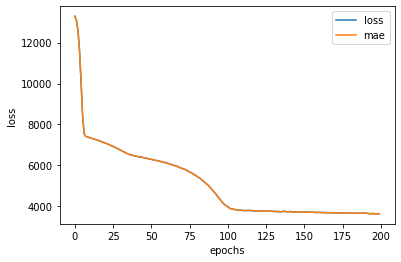

In [18]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normilization and standardization)

In terms of scaling values, neural networks prefer to see normilization.

If I'm are not sure which to use, I can try both to see which one preforms better.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe.
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### To prepare the data, I will imoprt some classes from Scikit-Learn

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in those colums between 0 and 1
     (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
     )

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to training data
ct.fit(X_train)

# Treansform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [27]:
# What the data looks like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [28]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [29]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [69]:
# Build a neural network model to fit on the normalized data

# 0. Set random seed for reproducability
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

In [70]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)
# insurance_model_2:  
#9/9 [==============================] - 0s 2ms/step - loss: 4924.4961 - mae: 4924.4961
[4924.49609375, 4924.49609375] 

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


[4924.49609375, 4924.49609375]

In [71]:
100 * ((tf.squeeze(insurance_model_4.predict(X_test_normal)) - y_test) / y_test)

<tf.Tensor: shape=(268,), dtype=float32, numpy=
array([ 3.25603557e+00,  1.55614271e+01,  4.98176117e+01,  3.69842380e-01,
       -6.20081425e+00,  2.74255981e+01, -4.56915627e+01, -4.52171230e+00,
       -2.97021389e+00,  2.42017984e-01,  9.20834732e+01,  7.90043259e+00,
        9.16129780e+00, -1.25473232e+01, -1.19851713e+01, -9.38249683e+00,
        9.58377266e+00, -6.96065807e+00,  6.89891195e+00,  7.58915405e+01,
       -2.06600971e+01,  8.71233654e+00, -4.24999542e+01,  1.36488276e+01,
       -1.02312076e+00,  4.13918734e+00, -1.79285550e+00, -7.39189072e+01,
        2.92171454e+00, -5.28284073e+01, -4.71249695e+01, -1.37710974e-01,
       -1.16152599e-01, -8.84103012e+00,  2.87591314e+00,  1.90832176e+01,
       -2.65906544e+01,  8.94254780e+00,  7.15722427e+01, -5.68430519e+00,
       -3.39830399e+01, -1.08028316e+01,  9.21123922e-01, -4.29558134e+00,
        1.55899134e+01, -4.88075876e+00, -1.48281889e+01, -1.60863400e+01,
       -6.85647726e+00,  1.75473518e+01, -3.67380977

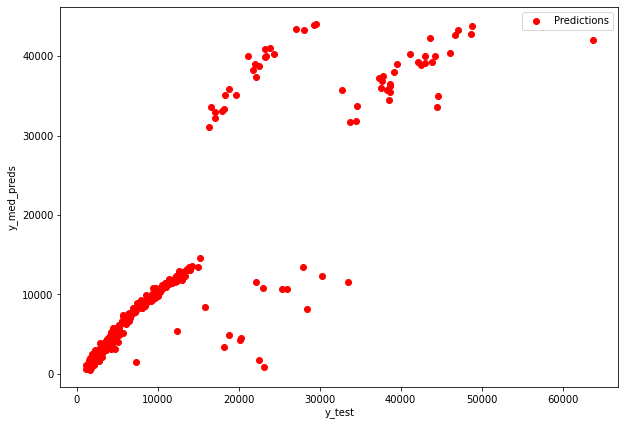

In [72]:
# Make predictions with the trained model
y_med_preds = tf.squeeze(insurance_model_4.predict(X_test_normal))

# Plot the model's predictions against regression data
plt.figure(figsize=(10, 7))
plt.xlabel("y_test")
plt.ylabel("y_med_preds")
plt.scatter(y_test, y_med_preds, c="r", label="Predictions")
plt.legend();

In [ ]:
# Build a neural network model to fit on the normalized data

# 0. Set random seed for reproducability
tf.random.set_seed(42)

# 1. Create the model
insurance_model_5 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100, activation="relu"),
                                         tf.keras.layers.Dense(10, activation="relu"),
                                         tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
insurance_model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 2.9 Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_medical = insurance_model_5.fit(X_train_normal, y_train, epochs=100,
                        callbacks=[lr_scheduler])

In [ ]:
insurance_model_5.predict(X_test_normal), y_train

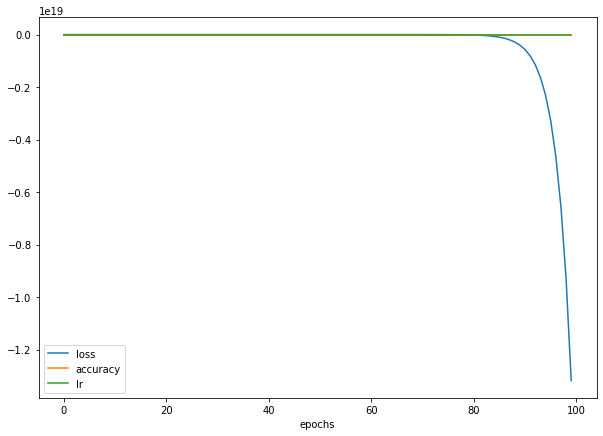

In [44]:
# Checkout the history
pd.DataFrame(history_medical.history).plot(figsize=(10, 7), xlabel="epochs");

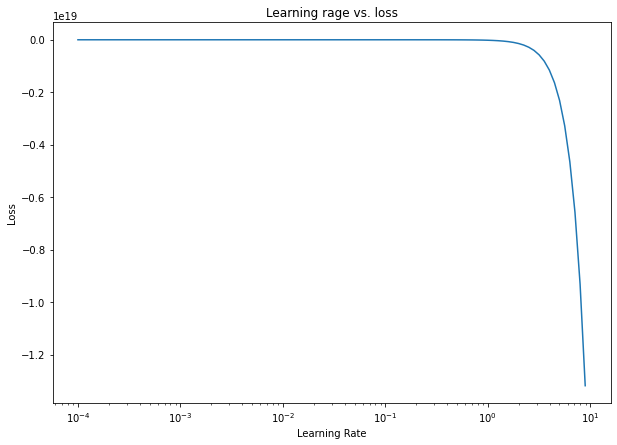

In [45]:
# Plot the learning rate vs. loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_medical.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rage vs. loss");